### Data import

In [1]:
import pandas as pd

train_data = pd.read_csv('car_evaluation.csv',delimiter=',',names=['buying', 'maint','doors','persons','lug_boot','safety','target'])
train_data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [2]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   target    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


### Data Plots

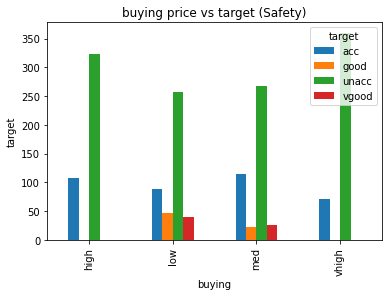

In [4]:
import matplotlib.pyplot as plt 

%matplotlib inline
pd.crosstab(train_data.buying,train_data.target).plot(kind='bar')
plt.title('buying price vs target (Safety)')
plt.xlabel('buying')
plt.ylabel('target')
plt.savefig('imgs/buying.png')

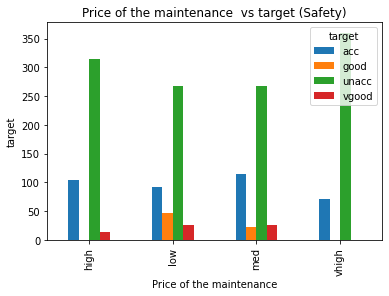

In [6]:
%matplotlib inline
pd.crosstab(train_data.maint,train_data.target).plot(kind='bar')
plt.title('Price of the maintenance  vs target (Safety)')
plt.xlabel('Price of the maintenance')
plt.ylabel('target')
plt.savefig('imgs/maint.png')

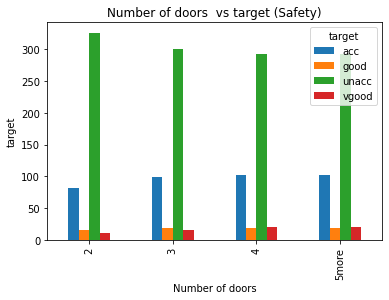

In [7]:
%matplotlib inline
pd.crosstab(train_data.doors,train_data.target).plot(kind='bar')
plt.title('Number of doors  vs target (Safety)')
plt.xlabel('Number of doors')
plt.ylabel('target')
plt.savefig('imgs/doors.png')

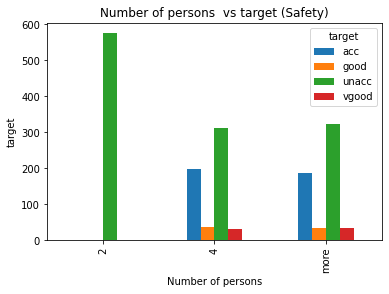

In [8]:
%matplotlib inline
pd.crosstab(train_data.persons,train_data.target).plot(kind='bar')
plt.title('Number of persons  vs target (Safety)')
plt.xlabel('Number of persons')
plt.ylabel('target')
plt.savefig('imgs/persons.png')

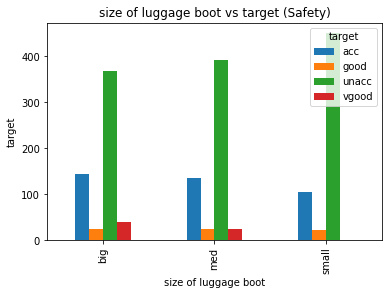

In [10]:
%matplotlib inline
pd.crosstab(train_data.lug_boot,train_data.target).plot(kind='bar')
plt.title('size of luggage boot vs target (Safety)')
plt.xlabel('size of luggage boot')
plt.ylabel('target')
plt.savefig('imgs/luggage.png')

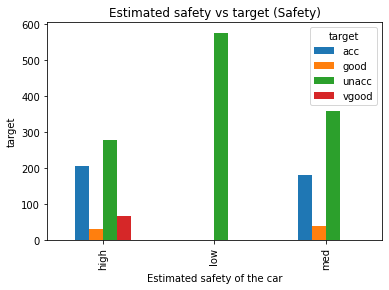

In [11]:
%matplotlib inline
pd.crosstab(train_data.safety,train_data.target).plot(kind='bar')
plt.title('Estimated safety vs target (Safety)')
plt.xlabel('Estimated safety of the car')
plt.ylabel('target')
plt.savefig('imgs/safety.png')

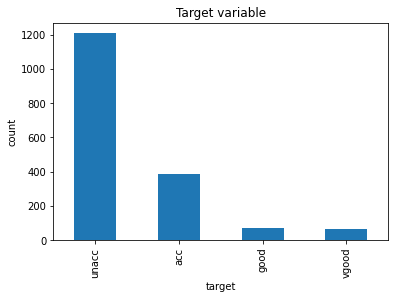

In [13]:
train_data['target'].value_counts().plot(kind='bar')
plt.title('Target variable')
plt.xlabel('target')
plt.ylabel('count')
plt.savefig('imgs/target.png')

In [14]:
from scipy.stats import chi2_contingency#Testing the relationship

#chi_res = chi2_contingency(pd.crosstab(loan['Loan_Status'], loan['Gender']))
#print('Chi2 Statistic: {}, p-value: {}'.format(chi_res[0], chi_res[1]))

import itertools
comb = itertools.combinations(train_data.columns, 2)
comb = list(comb)
for i in comb:
    chi_res = chi2_contingency(pd.crosstab(train_data[i[0]].astype('object',copy=True,errors='ignore'),train_data[i[1]].astype('object',copy=True,errors='ignore')))
    print(i[0]+' - '+i[1]+' p-value = '+str(chi_res[1]))

buying - maint p-value = 1.0
buying - doors p-value = 1.0
buying - persons p-value = 1.0
buying - lug_boot p-value = 1.0
buying - safety p-value = 1.0
buying - target p-value = 5.9280625992133936e-36
maint - doors p-value = 1.0
maint - persons p-value = 1.0
maint - lug_boot p-value = 1.0
maint - safety p-value = 1.0
maint - target p-value = 2.5476519845077733e-26
doors - persons p-value = 1.0
doors - lug_boot p-value = 1.0
doors - safety p-value = 1.0
doors - target p-value = 0.32024215990030563
persons - lug_boot p-value = 1.0
persons - safety p-value = 1.0
persons - target p-value = 4.039968047270742e-77
lug_boot - safety p-value = 1.0
lug_boot - target p-value = 1.0294402753134833e-09
safety - target p-value = 2.389155399044034e-100


### Pre-processing pipeline

In [32]:
# own type of encoding
data = train_data.copy()

# order buying ,maint ,doors ,persons ,lug_boot ,safety ,target
categories_order = {'buying':['low','med','high','vhigh'],'maint':['low','med','high','vhigh'],'doors':['2','3','4','5more'],'persons':['2','4','more'] 
                    ,'lug_boot':['small','med','big'],'safety':['low','med','high'],'target':['unacc','acc','good','vgood']}

In [33]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,4,vhigh,2,2,small,low,unacc
1,4,vhigh,2,2,small,med,unacc
2,4,vhigh,2,2,small,high,unacc
3,4,vhigh,2,2,med,low,unacc
4,4,vhigh,2,2,med,med,unacc


In [34]:
for col in data.columns:
    dic = {}
    o = 1
    for i in categories_order[col]:
        dic[i] = o
        o = o+1
    print(dic)
    data[col].replace(dic, inplace=True)

{'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
{'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
{'2': 1, '3': 2, '4': 3, '5more': 4}
{'2': 1, '4': 2, 'more': 3}
{'small': 1, 'med': 2, 'big': 3}
{'low': 1, 'med': 2, 'high': 3}
{'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}


In [35]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,target
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1


### Decision tree classifier Model

In [36]:
# train test split
from sklearn.model_selection import train_test_split

X = data.drop('target',axis=1)
y = data['target']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.7,random_state=143,stratify = y)

In [89]:
from sklearn.tree import DecisionTreeClassifier

clf_model = DecisionTreeClassifier(criterion="gini", random_state=42,max_depth=8, min_samples_leaf=5)   
clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=42)

In [106]:
y_pred = clf_model.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,y_pred)

0.9190082644628099

In [92]:
target = list(data['target'].unique())
feature_names = list(X.columns)

In [104]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(clf_model,
                                out_file=None, 
                      feature_names=feature_names,  
                      class_names=target,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  


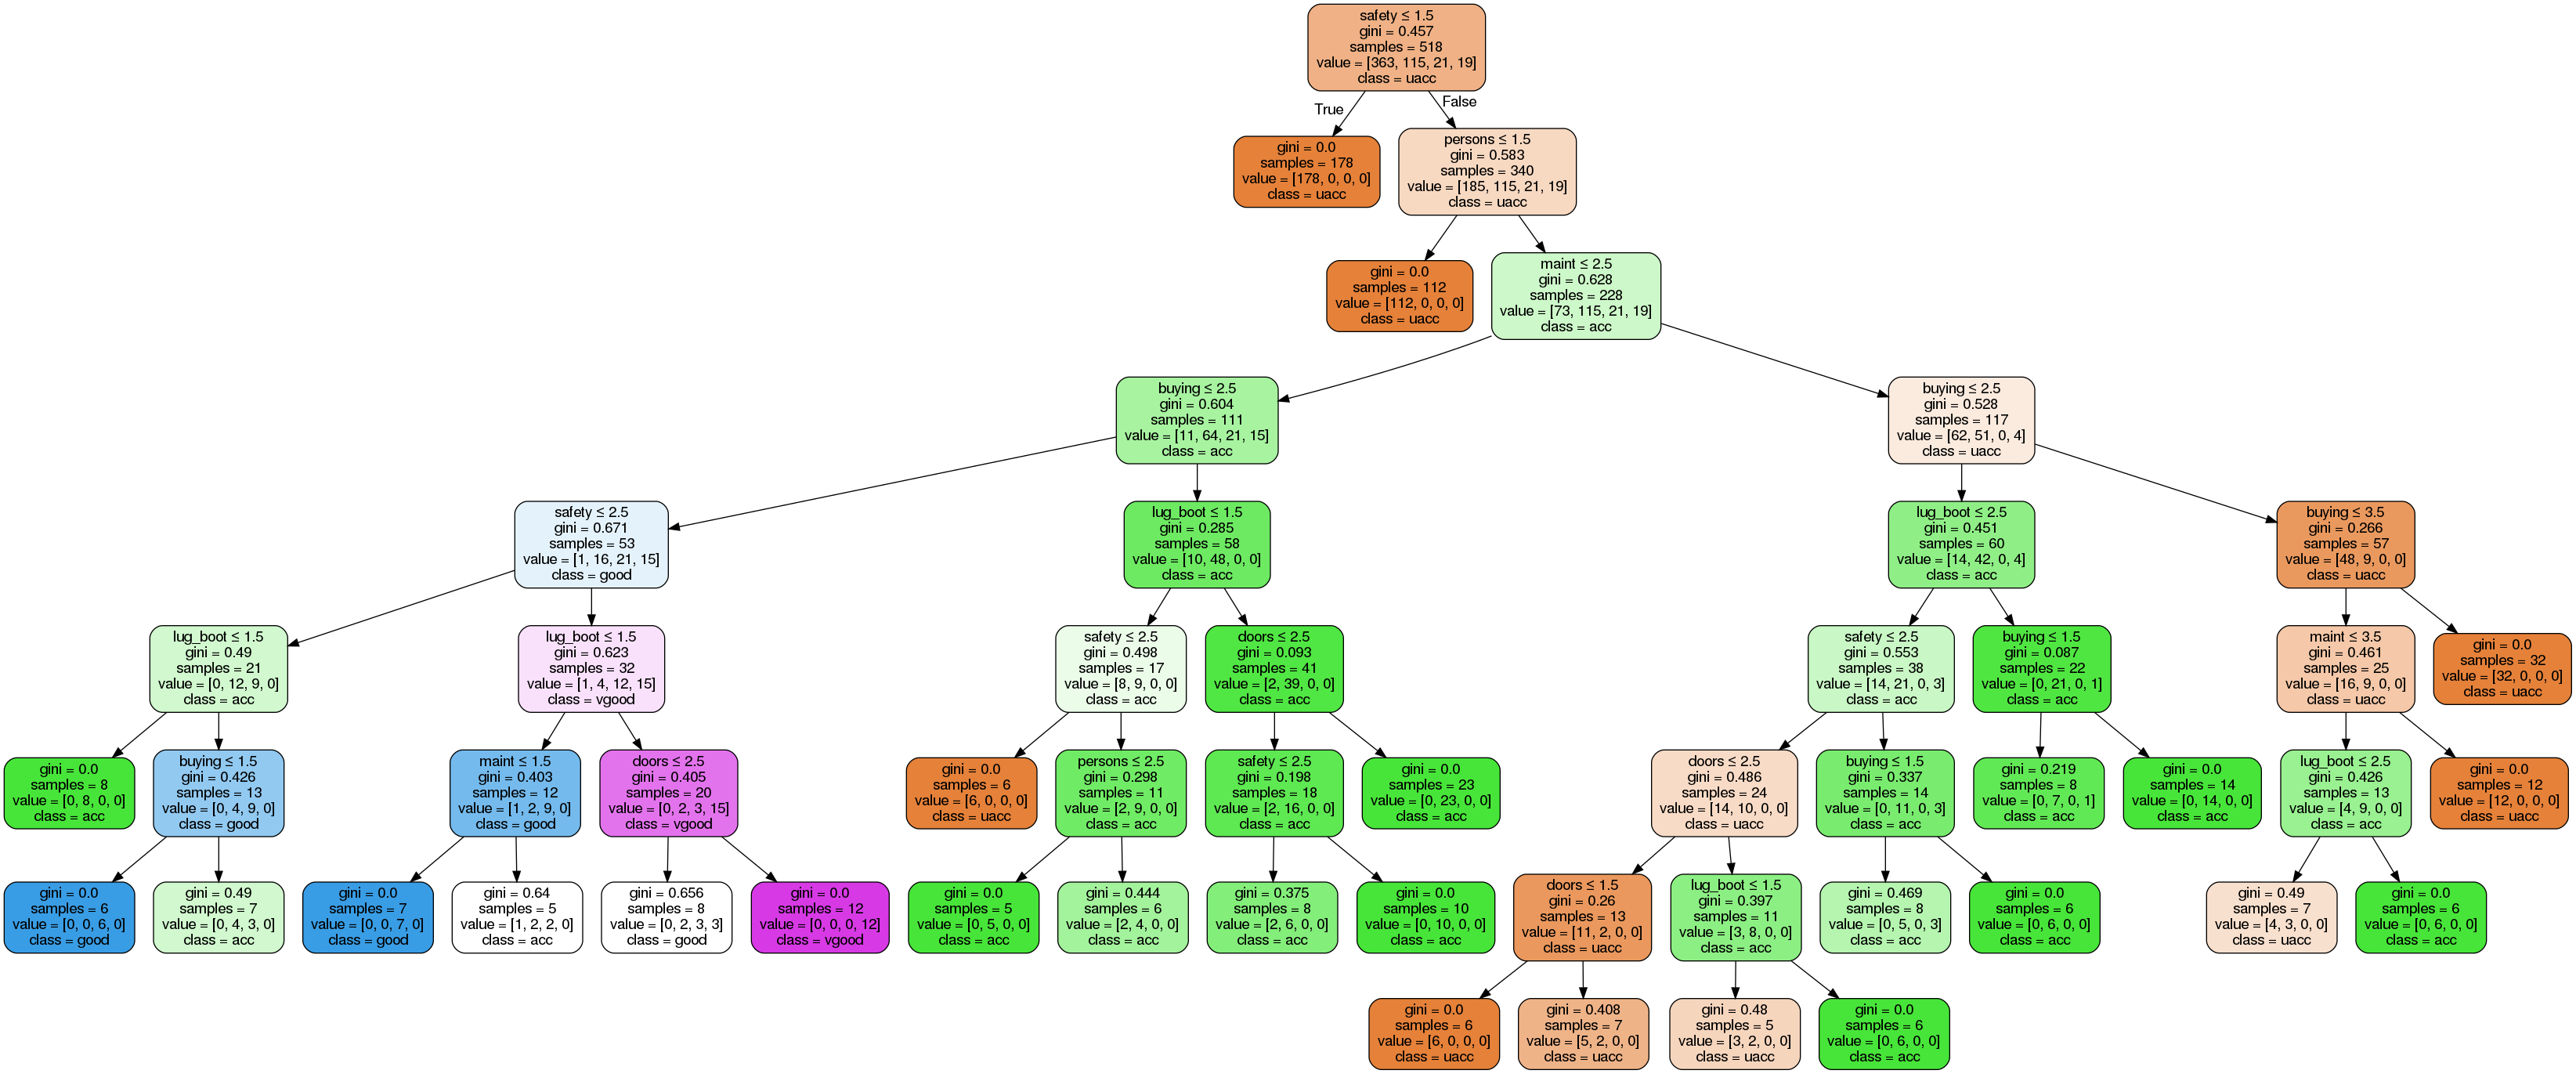

In [103]:
from IPython.display import Image 
from pydot import graph_from_dot_data

(graph, ) = graph_from_dot_data(dot_data)
Image(graph.create_png())

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97       847
           2       0.84      0.87      0.86       269
           3       0.56      0.69      0.62        48
           4       1.00      0.43      0.61        46

    accuracy                           0.92      1210
   macro avg       0.84      0.74      0.76      1210
weighted avg       0.92      0.92      0.92      1210



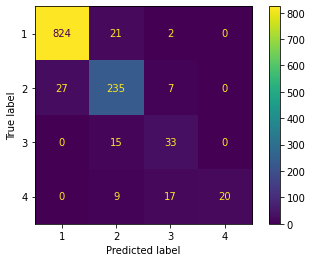

In [110]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf_model, X_test, y_test)  

In [114]:
y_prob_pred = clf_model.predict_proba(X_test)

In [115]:
roc_auc_score(y_test, y_prob_pred, multi_class='ovo', average='weighted')

0.9810064851931964

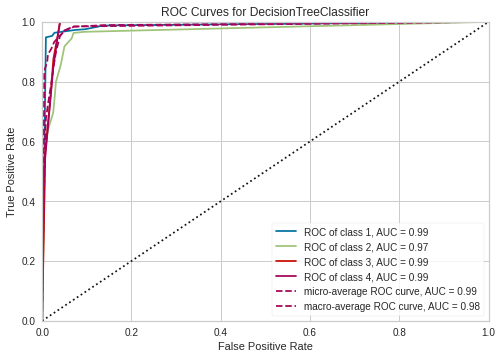

In [124]:
from yellowbrick.classifier import ROCAUC

visualizer = ROCAUC(clf_model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()  

### Attempt2

In [2]:
from chefboost import Chefboost as chef
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

X = pd.read_csv('car_evaluation.csv',delimiter=',',names=['buying', 'maint','doors','persons','lug_boot','safety','Decision'])
X.head()

,buying,maint,doors,persons,lug_boot,safety,Decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=X["Decision"])

In [5]:
config = {'algorithm': 'ID3'}
model = chef.fit(X_train, config = config)

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  31.305806875228882  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  1382  instances
Labels:  ['acc' 'unacc' 'good' 'vgood']
Confusion matrix:  [[307, 0, 0, 0], [0, 968, 0, 0], [0, 0, 55, 0], [0, 0, 0, 52]]
Decision  acc  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  unacc  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  good  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %
Decision  vgood  => Accuray:  100.0 %, Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [6]:
prediction = chef.predict(model, X_test.iloc[0])

In [7]:
evaluation = chef.evaluate(model, X_test, task="test")

-------------------------
Evaluate  test set
-------------------------
Accuracy:  95.95375722543352 % on  346  instances
Labels:  ['good' 'unacc' 'acc' 'vgood']
Confusion matrix:  [[14, 0, 1, 0], [0, 235, 5, 0], [0, 7, 70, 0], [0, 0, 1, 13]]
Decision  good  => Accuray:  99.711 %, Precision:  93.3333 %, Recall:  100.0 %, F1:  96.5517 %
Decision  unacc  => Accuray:  96.5318 %, Precision:  97.9167 %, Recall:  97.1074 %, F1:  97.5104 %
Decision  acc  => Accuray:  95.9538 %, Precision:  90.9091 %, Recall:  90.9091 %, F1:  90.9091 %
Decision  vgood  => Accuray:  99.711 %, Precision:  92.8571 %, Recall:  100.0 %, F1:  96.2963 %


/home/ilan/.local/lib/python3.6/site-packages/chefboost/commons/functions.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Prediction'] = predictions


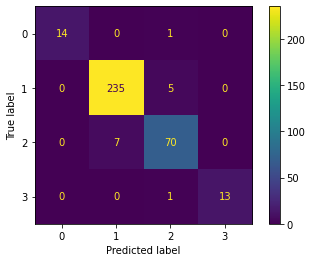

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt 

disp = ConfusionMatrixDisplay(np.array([[14, 0, 1, 0], [0, 235, 5, 0], [0, 7, 70, 0], [0, 0, 1, 13]]))
disp.plot()
plt.show()

Decision rule:  outputs/rules/rules.py


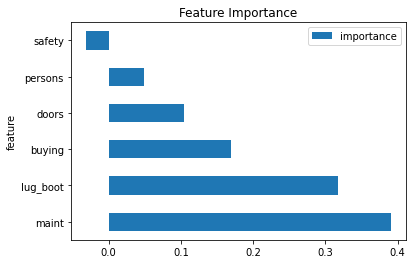

In [8]:
rules = "outputs/rules/rules.py"
fi = chef.feature_importance(rules).set_index("feature")
fi.plot(kind="barh", title="Feature Importance");